# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Renfred Leeman]
- **Email:** [m271b4ky3749@bangkit.academy]
- **ID Dicoding:** [renfred_leeman_bangk]

## Menentukan Pertanyaan Bisnis

- Pada bulan apa harga sewa sepeda paling tinggi dan paling rendah dalam 2 tahun terakhir?
- Bagaimana cuaca "temp, atemp, humidity, dan windspeed" dapat mempengaruhi tingkat sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [500]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

# Attribute Information
attribute_info = """
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv:

- instant: record index
- dteday: date
- season: season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: year (0: 2011, 1:2012)
- mnth: month (1 to 12)
- hr: hour (0 to 23)
- holiday: weather day is holiday or not (extracted from [Web Link])
- weekday: day of the week
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit:
  1: Clear, Few clouds, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
"""

# Link for further information
info_link = "For further more information please go through the following link: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset"

### Gathering Data

In [501]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [502]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari file day.csv memiliki data (instant,	dteday,	season,	yr,	mnth holiday,	weekday,	workingday,	weathersit,	temp,	atemp,	hum,	windspeed,	casual,	registered,	cnt) yang memiliki masing-masing nilai

- Dari file hour.csv memiliki data (instant,	dteday,	season,	yr,	mnth,	hr,	holiday,	weekday,	workingday,	weathersit,	temp,	atemp,	hum,	windspeed,	casual,	registered,	cnt) masing-masing nilai

### Assessing Data

#### Menilai Tabel day_df

In [503]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [504]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [505]:
print("Jumlah data day terduplikasi: ", day_df.duplicated().sum())

Jumlah data day terduplikasi:  0


In [506]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai hour day_df

In [507]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [508]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [509]:
print("Jumlah data hour terduplikasi: ", hour_df.duplicated().sum())

Jumlah data hour terduplikasi:  0


In [510]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari kedua data di atas tidak terdapat masalah tipe data baik (int, float, dan object) inacurate value, missing values, dan jumlah data terduplikasi.

- Berikut merupakan penjelasan pada analisis data pada data day:

 Kolom season memiliki rentang yang wajar yaitu 1-4 musim dalam 1 tahun. (Tidak ada inaccurate value)

 Kolom yr memilki pengkodean 0 pada tahun pertama dan 1 pada tahun kedua. (Tidak ada inaccurate value)

 Kolom mnth memiliki rentang nilai 1-12 yang menandakanjumlah bulan dalam setahun. (Tidak ada inaccurate value)

 Kolom holiday memiliki nilai 0 dan 1 yang menandakan holiday atau non holiday. (Tidak ada inaccurate value)

 Kolom weekday memiliki nilai 0-6 yang menandakan 7 hari dalam 1 minggu. (Tidak ada inaccurate value)

 Kolom working day memiliki nilai 0 dan 1 yang menandakan working atau not working. (Tidak ada inaccurate value)

 kolom wathersit memiliki nilai 1-3 yang menandakan cuaca 1, cuaca 2, dan cuaca3. (Tidak ada inaccurate value)

 kolom temp dan atemp memiliki nilai suhu yang tertentu dan nilainya diskala yang wajar. (Tidak ada inaccurate value)

 kolom hum memiliki rentang nilai 0 dan 1 yang akan di hitung dari presentase. (Tidak ada inaccurate value)

 kolom windspeed memiliki rentang nilai 0.022392 hingga 0.507463, hal ini sesuai dengan kecepatan angin sengan std. (Tidak ada inaccurate value)

 kolom casual, registered, dan cnt memiliki nilai jumlah pengguna yang tidak memiliki nilai inaccurate. (Tidak ada inaccurate value)


- Dari data day memiliki data yang hampir sama data hour, sehingga penjelasan data hour hampir sama dengan data day. Dari evaluasi data hour maka tidak ada inaccurate value.



### Cleaning Data

In [511]:
data = pd.read_csv('data/day.csv')

data['cnt'].interpolate(method='linear', limit_direction='forward', inplace=True)

Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

lowerthan = data['cnt'] < minimum
morethan = data['cnt'] > maximum

data.drop(data[lowerthan].index, inplace=True)
data.drop(data[morethan].index, inplace=True)

data['cnt'] = data['cnt'].mask(cond=morethan, other=maximum)
data['cnt'] = data['cnt'].mask(cond=lowerthan, other=minimum)

print(data.describe())


          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [512]:
data = pd.read_csv('data/hour.csv')

data['cnt'].interpolate(method='linear', limit_direction='forward', inplace=True)

Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

lowerthan = data['cnt'] < minimum
morethan = data['cnt'] > maximum

data.drop(data[lowerthan].index, inplace=True)
data.drop(data[morethan].index, inplace=True)

data['cnt'] = data['cnt'].mask(cond=morethan, other=maximum)
data['cnt'] = data['cnt'].mask(cond=lowerthan, other=minimum)

print(data.describe())


            instant        season            yr          mnth            hr  \
count  16874.000000  16874.000000  16874.000000  16874.000000  16874.000000   
mean    8542.168899      2.490399      0.487733      6.513275     11.458101   
std     5007.766040      1.111966      0.499864      3.462438      6.962144   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     4219.250000      1.000000      0.000000      4.000000      5.000000   
50%     8438.500000      2.000000      0.000000      7.000000     11.000000   
75%    12832.750000      3.000000      1.000000     10.000000     18.000000   
max    17379.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  16874.000000  16874.000000  16874.000000  16874.000000  16874.000000   
mean       0.029513      2.997748      0.678618      1.430663      0.492650   
std        0.169244      2.013054      0.467021    

In [513]:
# Rename Kolom day

day_df.rename(columns={'instant': 'id',
                       'dteday': 'date',
                       'yr': 'year',
                       'mnth': 'month',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity',
                       'cnt': 'count'}, inplace=True)
day_df.sample(5)

,id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
560,561,2012-07-14,3,1,7,0,6,0,2,0.703333,0.666042,0.699167,0.143679,2355,4614,6969
681,682,2012-11-12,4,1,11,1,1,0,1,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
521,522,2012-06-05,2,1,6,0,2,1,2,0.540833,0.525892,0.613333,0.209575,968,6033,7001
450,451,2012-03-26,2,1,3,0,1,1,1,0.445833,0.438750,0.477917,0.386821,795,4763,5558
388,389,2012-01-24,1,1,1,0,2,1,1,0.342500,0.349108,0.835833,0.123767,439,3900,4339


In [514]:
# Rename Kolom hour

hour_df.rename(columns={'instant': 'id',
                       'dteday': 'date',
                       'yr': 'year',
                        'hr': 'hour',
                       'mnth': 'month',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity',
                       'cnt': 'count'}, inplace=True)
hour_df.sample(5)

,id,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
5660,5661,2011-08-29,3,0,8,7,0,1,1,1,0.60,0.6061,0.60,0.2239,11,273,284
148,149,2011-01-07,1,0,1,11,0,5,1,2,0.20,0.1970,0.40,0.2239,19,48,67
9719,9720,2012-02-14,1,1,2,22,0,2,1,2,0.36,0.3636,0.50,0.1045,5,72,77
5245,5246,2011-08-11,3,0,8,11,0,4,1,1,0.76,0.6667,0.35,0.2537,59,128,187
11938,11939,2012-05-17,2,1,5,15,0,4,1,1,0.64,0.6212,0.36,0.2537,83,233,316


In [515]:
# Mengubah nilai day (season dari angka menjadi jenis season, tahun, jenis holiday, dan jenis working day)
season_change = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
day_df['season'] = day_df['season'].map(season_change)

year_change = {
    0: 2011,
    1: 2012
}

month_change = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

day_df['year'] = day_df['year'].map(year_change)

day_df['month'] = day_df['month'].map(month_change)

day_df['holiday'] = day_df['holiday'].replace({1: 'holiday', 0: 'not holiday'})

day_df['workingday'] = day_df['workingday'].map({1: 'working day', 0: 'not working day'})
day_df.sample(5)



,id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
426,427,2012-03-02,spring,2012,March,not holiday,5,working day,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194
249,250,2011-09-07,fall,2011,September,not holiday,3,working day,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
273,274,2011-10-01,winter,2011,October,not holiday,6,not working day,2,0.410000,0.412863,0.753750,0.292296,480,1949,2429
172,173,2011-06-22,fall,2011,June,not holiday,3,working day,1,0.733333,0.693829,0.707500,0.172262,661,3846,4507
659,660,2012-10-21,winter,2012,October,not holiday,0,not working day,1,0.464167,0.456429,0.510000,0.166054,2132,4692,6824


In [516]:
# Mengubah nilai hour (season dari angka menjadi jenis season, tahun, jenis holiday, dan jenis working day)
season_change = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
hour_df['season'] = hour_df['season'].map(season_change)

month_change = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}


hour_df['year'] = hour_df['year'].map(year_change)

hour_df['month'] = hour_df['month'].map(month_change)

hour_df['holiday'] = hour_df['holiday'].replace({1: 'holiday', 0: 'not holiday'})

hour_df['workingday'] = hour_df['workingday'].map({1: 'working day', 0: 'not working day'})
hour_df.sample(5)



,id,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
9873,9874,2012-02-21,spring,2012,February,10,not holiday,2,working day,1,0.24,0.2273,0.70,0.1940,8,77,85
9511,9512,2012-02-06,spring,2012,February,6,not holiday,1,working day,1,0.16,0.1818,0.86,0.1045,0,72,72
5461,5462,2011-08-20,fall,2011,August,11,not holiday,6,not working day,1,0.72,0.6667,0.58,0.0000,115,223,338
811,812,2011-02-06,spring,2011,February,6,not holiday,0,not working day,1,0.26,0.2576,0.60,0.2239,0,1,1
14881,14882,2012-09-17,fall,2012,September,6,not holiday,1,working day,1,0.48,0.4697,0.82,0.0000,7,157,164


**Insight:**
- Menggunakan metode interpolasi untuk menangani missing value pada cnt
- Mengubah nama kolom pada data day dan hour
- Mengubah bilangan seperti season awalnya 1-4 menjadi spring-winter, bulan, jenis holiday, dan working day.

## Exploratory Data Analysis (EDA)

### Explore *day_df*

In [517]:
day_df.sample(5)

,id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
126,127,2011-05-07,summer,2011,May,not holiday,6,not working day,1,0.520000,0.512621,0.541250,0.160450,1612,3102,4714
416,417,2012-02-21,spring,2012,February,not holiday,2,working day,1,0.287826,0.295113,0.594348,0.205717,163,3614,3777
294,295,2011-10-22,winter,2011,October,not holiday,6,not working day,1,0.422500,0.425492,0.629167,0.092667,1499,2809,4308
685,686,2012-11-16,winter,2012,November,not holiday,5,working day,1,0.345000,0.347204,0.524583,0.171025,484,5214,5698
5,6,2011-01-06,spring,2011,January,not holiday,4,working day,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [518]:
day_df.describe(include="all")

,id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,January,not holiday,NaN,working day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,2.004787,NaN,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,NaN,3.000000,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,NaN,5.000000,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'weather_condition'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

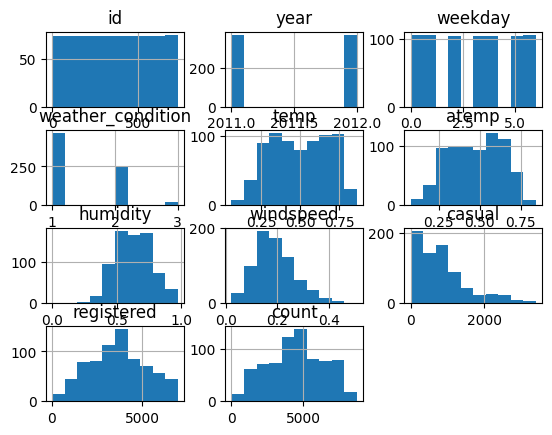

In [519]:
day_df.hist()

In [520]:
day_df.season.is_unique

False

In [521]:
day_df.groupby('season').agg(
    total_count=('count', 'sum'),
    max_count=('count', 'max'),
    min_count=('count', 'min'),
    mean_count=('count', 'mean'),
    std_count=('count', 'std')
)

,total_count,max_count,min_count,mean_count,std_count
season,,,,,
fall,1061129,8714,1115,5644.303191,1459.800381
spring,471348,7836,431,2604.132597,1399.942119
summer,918589,8362,795,4992.331522,1695.977235
winter,841613,8555,22,4728.162921,1699.615261


In [522]:
day_df.groupby(by="weather_condition")['id'].unique().apply(len).sort_values(ascending=False)

weather_condition
1    463
2    247
3     21
Name: id, dtype: int64

In [523]:
day_df.groupby('month').agg(
    total_count=('count', 'sum'),
    max_count=('count', 'max'),
    min_count=('count', 'min'),
    mean_count=('count', 'mean'),
    std_count=('count', 'std')
)

,total_count,max_count,min_count,mean_count,std_count
month,,,,,
April,269094,7460,795,4484.900000,1776.160778
August,351194,7865,1115,5664.419355,1494.516146
December,211036,6606,441,3403.806452,1549.639353
February,151352,5062,1005,2655.298246,1145.313307
January,134933,4521,431,2176.338710,1161.674370
July,344948,8173,3285,5563.677419,1273.751871
June,346342,8120,3767,5772.366667,1240.400031
March,228920,8362,605,3692.258065,1899.301812
May,331686,8294,2633,5349.774194,1298.711561


### Explore hour_df

In [524]:
hour_df.sample(5)

,id,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
5190,5191,2011-08-09,fall,2011,August,4,not holiday,2,working day,1,0.70,0.6667,0.74,0.0000,1,6,7
16411,16412,2012-11-21,winter,2012,November,13,not holiday,3,working day,1,0.44,0.4394,0.35,0.2239,70,295,365
799,800,2011-02-05,spring,2011,February,18,not holiday,6,not working day,2,0.28,0.2424,0.93,0.4478,2,81,83
697,698,2011-02-01,spring,2011,February,10,not holiday,2,working day,2,0.16,0.2273,0.93,0.0000,0,47,47
2280,2281,2011-04-09,summer,2011,April,21,not holiday,6,not working day,2,0.36,0.3485,0.93,0.1343,10,65,75


In [525]:
hour_df.describe(include="all")

,id,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,May,NaN,not holiday,NaN,working day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,16879,NaN,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,3.003683,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,2.005771,NaN,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,1.000000,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,2012.000000,NaN,12.000000,NaN,3.000000,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,2012.000000,NaN,18.000000,NaN,5.000000,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'weather_condition'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

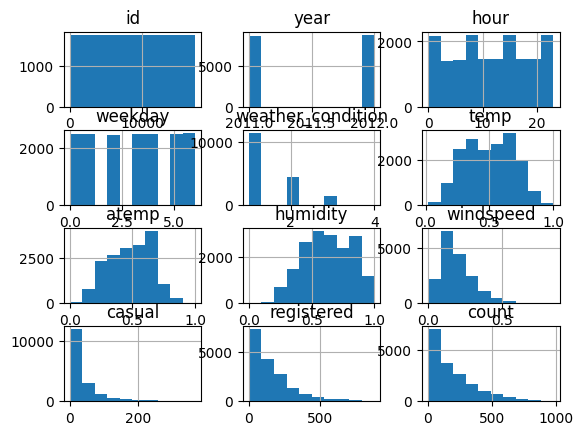

In [526]:
hour_df.hist()

In [527]:
hour_df.groupby('season').agg(
    total_count=('count', 'sum'),
    max_count=('count', 'max'),
    min_count=('count', 'min'),
    mean_count=('count', 'mean'),
    std_count=('count', 'std')
)

,total_count,max_count,min_count,mean_count,std_count
season,,,,,
fall,1061129,977,1,236.016237,197.711630
spring,471348,801,1,111.114569,119.224010
summer,918589,957,1,208.344069,188.362473
winter,841613,967,1,198.868856,182.967972


In [528]:
hour_df.groupby(by="hour")['id'].unique().apply(len).sort_values(ascending=False)

hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: id, dtype: int64

In [529]:
hour_df.groupby('hour').agg(
    total_count=('count', 'sum'),
    max_count=('count', 'max'),
    min_count=('count', 'min'),
    mean_count=('count', 'mean'),
    std_count=('count', 'std')
)

,total_count,max_count,min_count,mean_count,std_count
hour,,,,,
0,39130,283,2,53.898072,42.307910
1,24164,168,1,33.375691,33.538727
2,16352,132,1,22.869930,26.578642
3,8174,79,1,11.727403,13.239190
4,4428,28,1,6.352941,4.143818
5,14261,66,1,19.889819,13.200765
6,55132,213,1,76.044138,55.084348
7,154171,596,1,212.064649,161.441936
8,261001,839,5,359.011004,235.189285


### Explore all data

In [530]:
merged_df = pd.merge(
    left=day_df,
    right=hour_df,
    how='inner',
    on=['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
)
print(merged_df.head())\

merged_df.sample(5)

   id_x        date  season  year    month      holiday  weekday  \
0     1  2011-01-01  spring  2011  January  not holiday        6   
1     1  2011-01-01  spring  2011  January  not holiday        6   
2     1  2011-01-01  spring  2011  January  not holiday        6   
3     1  2011-01-01  spring  2011  January  not holiday        6   
4     1  2011-01-01  spring  2011  January  not holiday        6   

        workingday  weather_condition    temp_x  ...  count_x  id_y  hour  \
0  not working day                  2  0.344167  ...      985     6     5   
1  not working day                  2  0.344167  ...      985    14    13   
2  not working day                  2  0.344167  ...      985    15    14   
3  not working day                  2  0.344167  ...      985    16    15   
4  not working day                  2  0.344167  ...      985    17    16   

   temp_y  atemp_y  humidity_y  windspeed_y  casual_y  registered_y  count_y  
0    0.24   0.2576        0.75       0.0896      

,id_x,date,season,year,month,holiday,weekday,workingday,weather_condition,temp_x,...,count_x,id_y,hour,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y
4712,276,2011-10-03,winter,2011,October,not holiday,1,working day,2,0.384167,...,3570,6509,18,0.40,0.4091,0.76,0.1642,28,384,412
2728,165,2011-06-14,summer,2011,June,not holiday,2,working day,1,0.604167,...,4891,3864,21,0.60,0.6212,0.56,0.2985,37,206,243
8125,466,2012-04-10,summer,2012,April,not holiday,2,working day,1,0.446667,...,5918,11055,18,0.54,0.5152,0.22,0.4179,78,626,704
9360,536,2012-06-19,summer,2012,June,not holiday,2,working day,1,0.688333,...,6825,12737,21,0.76,0.7121,0.62,0.1642,37,239,276
157,10,2011-01-10,spring,2011,January,not holiday,1,working day,1,0.150833,...,1321,216,6,0.12,0.1212,0.50,0.2836,0,31,31


In [531]:
merged_df.groupby(by=["date", "hour"]).agg({
    "casual_y": "sum",
    "registered_y": "sum",
    "count_y": "sum"
})

casual_y  registered_y  count_y
date       hour                                 
2011-01-01 5            0             1        1
           13          47            47       94
           14          35            71      106
           15          40            70      110
           16          41            52       93
...                   ...           ...      ...
2012-12-31 16          30           184      214
           17          14           150      164
           18          10           112      122
           19          11           108      119
           20           8            81       89

[12880 rows x 3 columns]

In [532]:
merged_df.groupby(by=["season", "date"]).agg({
    "casual_y": "sum",
    "registered_y": "sum",
    "count_y": "sum"
})

casual_y  registered_y  count_y
season date                                       
fall   2011-06-21       274          1982     2256
       2011-06-22       251          1735     1986
       2011-06-23       449          2366     2815
       2011-06-24       948          3775     4723
       2011-06-25      1725          3239     4964
...                     ...           ...      ...
winter 2012-12-16       506          2968     3474
       2012-12-17       189          4042     4231
       2012-12-18       382          4822     5204
       2012-12-19       333          4934     5267
       2012-12-20       303          3527     3830

[731 rows x 3 columns]

In [533]:
merged_df.groupby(by=["year", "season"]).agg({
    "casual_y": "sum",
    "registered_y": "sum",
    "count_y": "sum"
})

casual_y  registered_y  count_y
year season                                 
2011 fall       77258        259816   337074
     spring     18051        100086   118137
     summer     51085        178597   229682
     winter     41886        204478   246364
2012 fall      102235        402747   504982
     spring     28711        212981   241692
     summer    102530        346281   448811
     winter     64606        348504   413110

In [534]:
output_dir = "dashboard"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

merged_df.to_csv(f"{output_dir}/main_data.csv", index=False)

**Insight:**
- Pada data day dan hour:

 - Melakukan pengelompokan berdasarkan
 season dalam mencari nilai dari total_count,	max_count,	min_count,	mean_count, dan std_count.

 - Mencari banyaknya sharing sepeda sesuai dengan weather condition yang sering muncul yaitu weather 1 (Clear, Few clouds, Partly cloudy, and Partly cloudy) dengan total kemunculan 463 kali.

 - Melakukkan group untuk melihat tingkat penyewaan sepeda pada setiap bulan (January-Desember)

- Pada data hour:

 Melakukan pengelompokan tingkat penyewwaan sepeda sesuai dengan jam, dalam mencari nilai total_count,	max_count,	min_count,	mean_count, dan std_count.

- Pada pengabungan data day dan hour melakukan pengabungan seluruh data yang dimana dengan akhiran "_x" merupakan data day dan "_y" merupakan data hour.

- Melakukan merge pada tanggal dan jam penyewaan sepeda dalam melihat casual_y	registered_y,	dan count_y.

- Melakukan ekspansi pada season yang memuat tanggal.

- Melakukan ekspansi pada tahun dalam melihat per-season.

## Visualization & Explanatory Analysis

### Pada bulan apa saja harga sewa sepeda paling tinggi dan paling rendah dalam 2 tahun terakhir?

In [535]:
monthly_rentals = merged_df.groupby('month')['count_y'].sum().reset_index()
monthly_rentals = monthly_rentals.sort_values(by='count_y', ascending=False)
monthly_rentals


,month,count_y
5,July,280567
6,June,277696
1,August,271414
11,September,269588
10,October,241978
8,May,232940
0,April,206153
9,November,205136
2,December,169646
7,March,162882


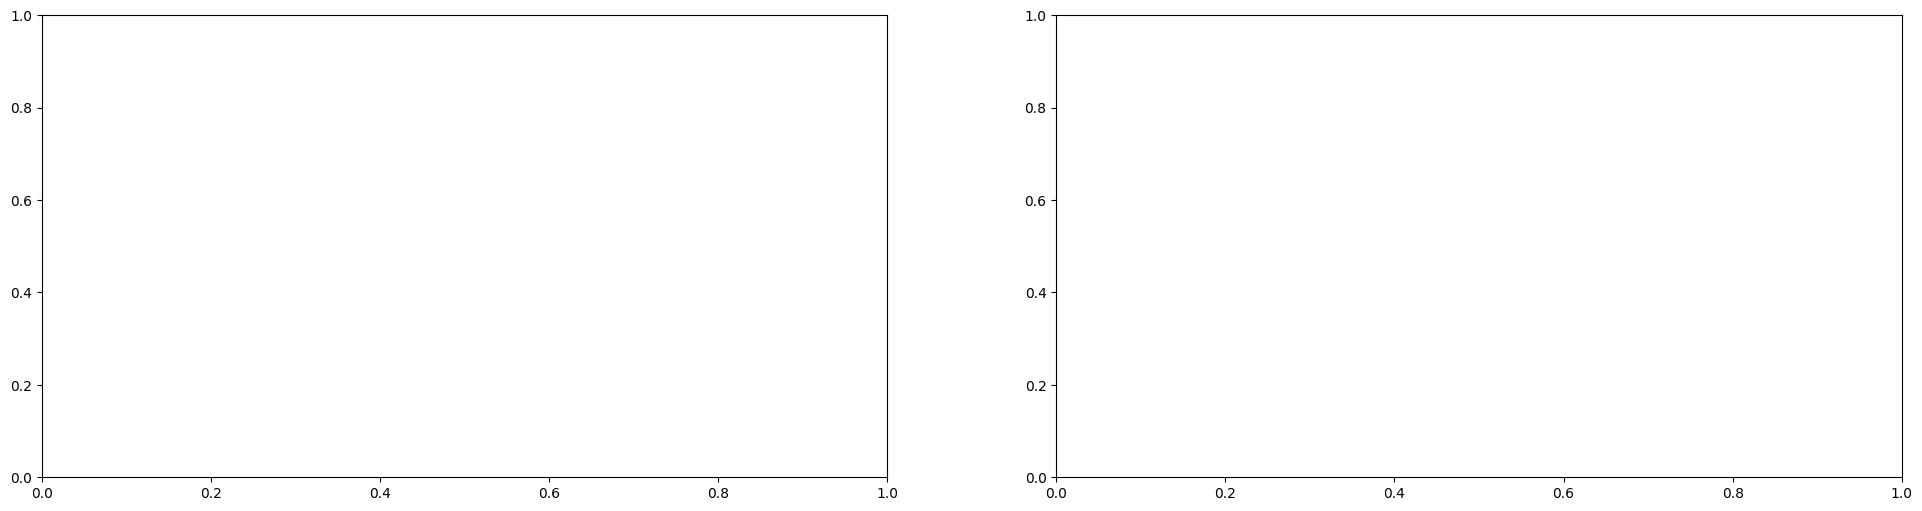

In [536]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\renfr\AppData\Local\Temp\ipykernel_20092\1681518326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count_y", y="month", data=monthly_rentals.head(5), palette=colors1, ax=ax[0])
C:\Users\renfr\AppData\Local\Temp\ipykernel_20092\1681518326.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count_y", y="month", data=monthly_rentals.sort_values(by="count_y", ascending=True).head(5), palette=colors2, ax=ax[1])


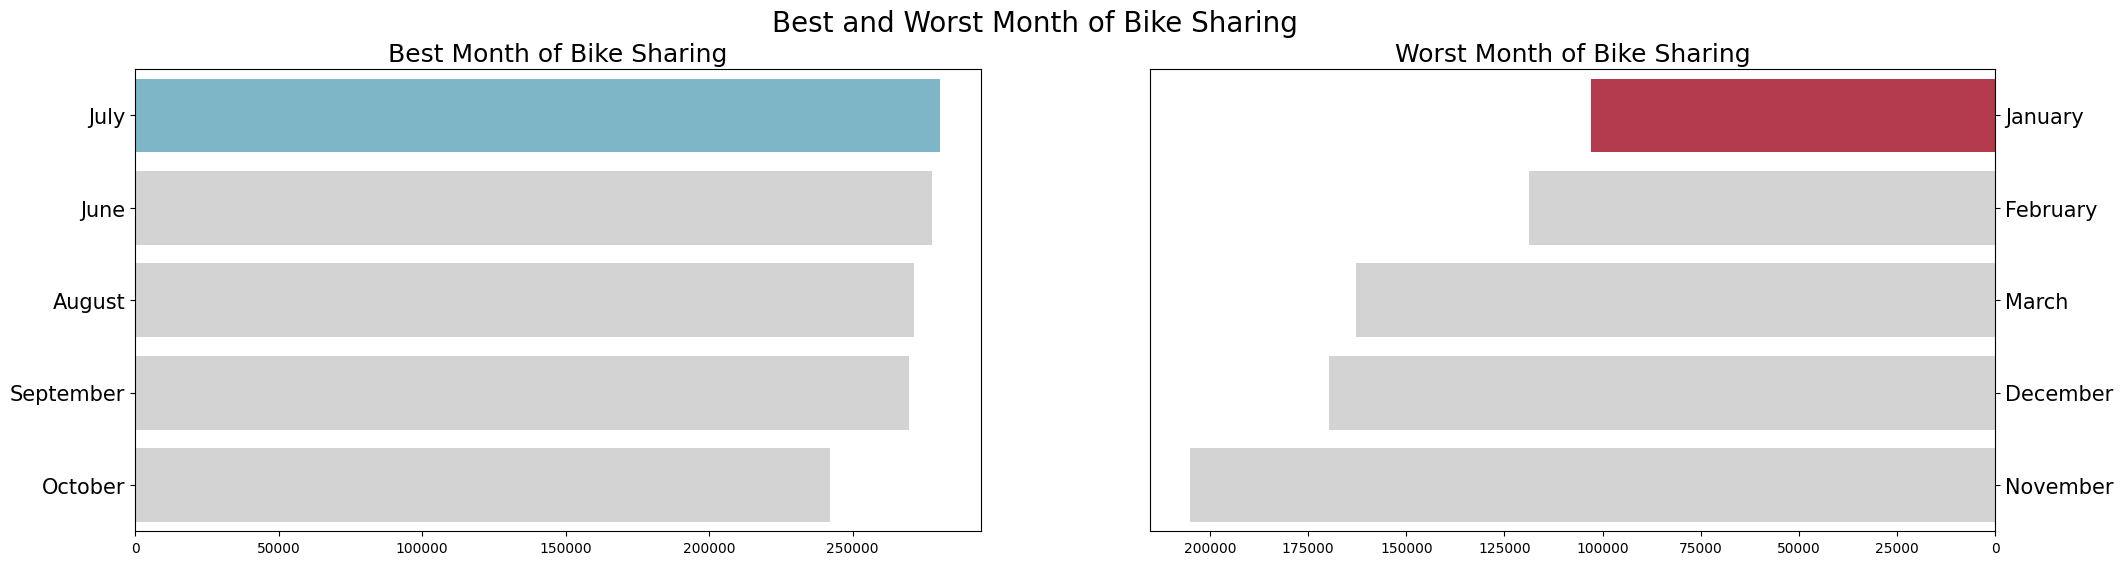

In [537]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#C7253E", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count_y", y="month", data=monthly_rentals.head(5), palette=colors1, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Month of Bike Sharing", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="count_y", y="month", data=monthly_rentals.sort_values(by="count_y", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Month of Bike Sharing", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Month of Bike Sharing", fontsize=20)
plt.show()


In [538]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

if merged_df['month'].dtype == object:
    merged_df['month'] = merged_df['month'].map(month_mapping)

merged_df['month'] = merged_df['month'].astype(int)
monthly_rentals = merged_df.groupby('month')['count_y'].sum().reset_index()
monthly_rentals = monthly_rentals.sort_values(by='month', ascending=True)
monthly_rentals['month_name'] = monthly_rentals['month'].map(month_change)

print(monthly_rentals[['month_name', 'count_y']])


   month_name  count_y
0     January   103022
1    February   118830
2       March   162882
3       April   206153
4         May   232940
5        June   277696
6        July   280567
7      August   271414
8   September   269588
9     October   241978
10   November   205136
11   December   169646


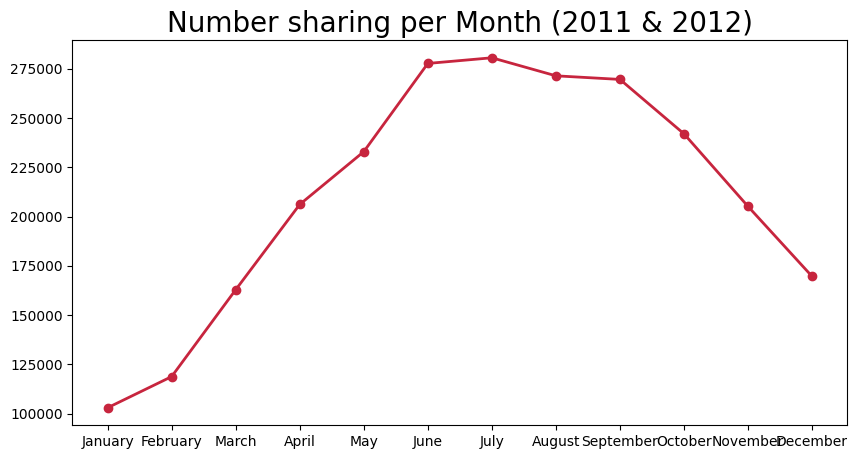

In [539]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_rentals["month_name"],
    monthly_rentals["count_y"],
    marker='o',
    linewidth=2,
    color="#C7253E"
)
plt.title("Number sharing per Month (2011 & 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Bagaimana cuaca "temp, atemp, humidity, dan windspeed" dapat mempengaruhi tingkat sewa sepeda?

               temp_y   atemp_y  humidity_y  windspeed_y   count_y
temp_y       1.000000  0.987975   -0.081134    -0.020992  0.400821
atemp_y      0.987975  1.000000   -0.057755    -0.062250  0.395517
humidity_y  -0.081134 -0.057755    1.000000    -0.318962 -0.327285
windspeed_y -0.020992 -0.062250   -0.318962     1.000000  0.109922
count_y      0.400821  0.395517   -0.327285     0.109922  1.000000


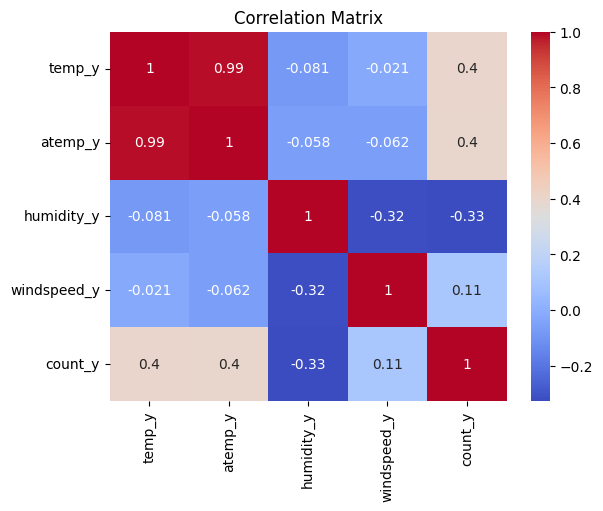

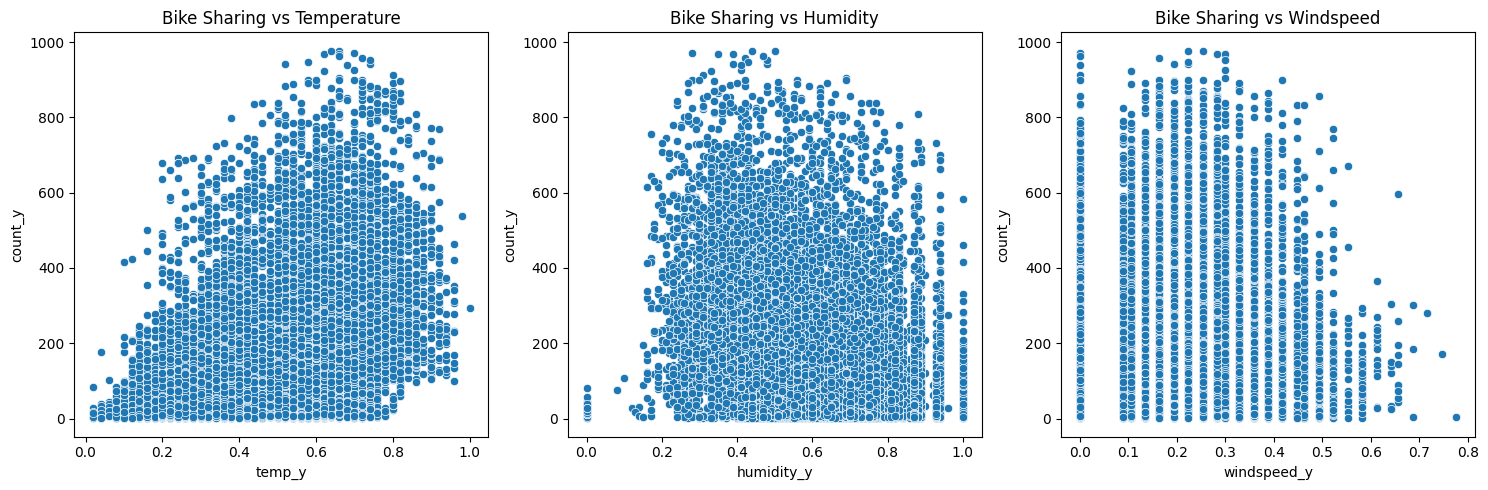

                            OLS Regression Results                            
Dep. Variable:                count_y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1078.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:10:20   Log-Likelihood:                -83585.
No. Observations:               12880   AIC:                         1.672e+05
Df Residuals:                   12875   BIC:                         1.672e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         163.1920      7.642     21.353      

In [540]:
matrix_df = merged_df[['temp_y', 'atemp_y', 'humidity_y', 'windspeed_y', 'count_y']].corr()
print(matrix_df)

sns.heatmap(matrix_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=merged_df, x='temp_y', y='count_y')
plt.title('Bike Sharing vs Temperature')

plt.subplot(1, 3, 2)
sns.scatterplot(data=merged_df, x='humidity_y', y='count_y')
plt.title('Bike Sharing vs Humidity')

plt.subplot(1, 3, 3)
sns.scatterplot(data=merged_df, x='windspeed_y', y='count_y')
plt.title('Bike Sharing vs Windspeed')

plt.tight_layout()
plt.show()

X = merged_df[['temp_y', 'atemp_y', 'humidity_y', 'windspeed_y']]
y = merged_df['count_y']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


**Insight:**
- Pada bulan apa saja harga sewa sepeda paling tinggi dan paling rendah dalam 2 tahun terakhir?
  - Melakukan group data terlebih dahulu pada bulan dan count_y yang merupakan totalan dari jam penyewaan.
  - Membuat subplot dalam memberikan visualisasi data dari Best month of bike sharing yaitu, bulan july. Worst month of bike sharing yaitu, bulan january.
  - Mengurutkan bulan yang awalnya diurutkan berdasarkan abjad menjadi January-December.
  - Membuat grafik dalam melihat Penyewaan dalam 2 tahun terakhir pada bulan January-December.


- Bagaimana cuaca "temp, atemp, humidity,dan windspeed" dapat mempengaruhi tingkat sewa sepeda?
  - Membuat correlation matrix untuk melihat regresi tingkat penyewaan sepeda yang paling sering muncul dalam hubungan cuaca.
  - Korelasi antar temp_y dengan count_y memmiliki korelasi positif satu sama lain, dimana semakin tinggi suhu, tingkat penyewaan sepeda semakin meningkat.
  - Korelasi antara atemp_y dengan count_y memiliki korelasi positif, semakin tinggi atemp maka semakin tinggi jumlah penyewaan sepeda.
  - Korelasi antara humidity_y dengan count_y memiliki korelasi negatif. Apabila tingkat humidity rendah dan tinggi maka, tingkat penyewaan sepeda akan berkurang. Apabila humidity di skala 0.4 sampai 0.6 maka tingkat penyewaan sepeda akan banyak (humidity normal).
  - Korelasi antara windspeed_y dengan count_y memiliki korelasi positif. Tingkat penyewaan sepeda akan tinggi apabila windspeed rendah dan menurun apabila tingkat windspeed meningkat.

## RFM Analysis

In [541]:
# Menghitung penyewaan perhari
rfm_df = merged_df.groupby(by="id_x", as_index=False).agg({
    "date": "max",
    "id_y": "nunique",
    "count_y": "sum"
})
rfm_df.columns = ["id_y", "date", "frequency", "shared"]
rfm_df.head()

,id_y,date,frequency,shared
0,1,2011-01-01,10,608
1,2,2011-01-02,12,417
2,3,2011-01-03,22,1349
3,4,2011-01-04,22,1520
4,5,2011-01-05,23,1600


In [542]:
# Menghitung recency penyewaan sepeda
rfm_df["date"] = pd.to_datetime(rfm_df["date"], errors='coerce')
merged_df["date"] = pd.to_datetime(merged_df["date"], errors='coerce')
recent_date = merged_df["date"].max().date()
rfm_df["recency"] = rfm_df["date"].apply(lambda x: (recent_date - x.date()).days)

rfm_df.head()


,id_y,date,frequency,shared,recency
0,1,2011-01-01,10,608,730
1,2,2011-01-02,12,417,729
2,3,2011-01-03,22,1349,728
3,4,2011-01-04,22,1520,727
4,5,2011-01-05,23,1600,726


In [543]:
rfm_df.drop("date", axis=1, inplace=True)
rfm_df.head()

,id_y,frequency,shared,recency
0,1,10,608,730
1,2,12,417,729
2,3,22,1349,728
3,4,22,1520,727
4,5,23,1600,726


In [544]:
rfm_df.describe()

,id_y,frequency,shared,recency
count,731.000000,731.000000,731.000000,731.000000
mean,366.000000,17.619699,3474.489740,365.000000
std,211.165812,5.506195,2032.993624,211.165812
min,1.000000,1.000000,21.000000,0.000000
25%,183.500000,14.000000,1734.500000,182.500000
50%,366.000000,18.000000,3368.000000,365.000000
75%,548.500000,23.000000,4936.500000,547.500000
max,731.000000,24.000000,8434.000000,730.000000


In [545]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,id_y,frequency,shared,recency
730,731,12,2131,0
729,730,16,1551,1
728,729,17,748,2
727,728,17,2184,3
726,727,12,1109,4


In [546]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,id_y,frequency,shared,recency
628,629,24,7720,102
241,242,24,5204,489
194,195,24,5084,536
196,197,24,5923,534
197,198,24,5302,533


C:\Users\renfr\AppData\Local\Temp\ipykernel_20092\280609450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="id_y", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\renfr\AppData\Local\Temp\ipykernel_20092\280609450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="id_y", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\renfr\AppData\Local\Temp\ipykernel_20092\280609450.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

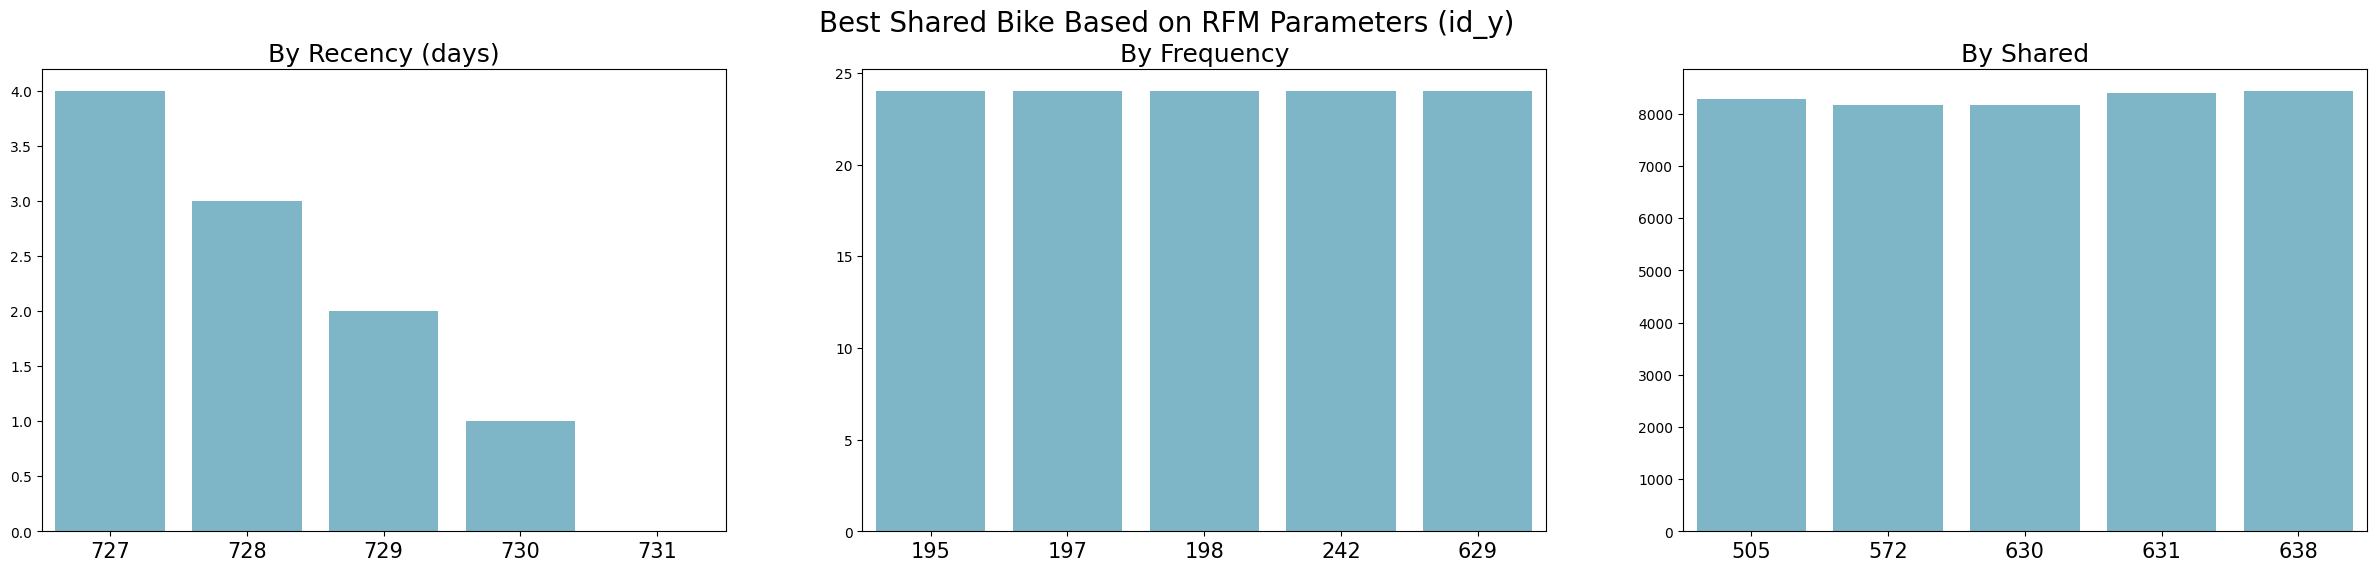

In [547]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="id_y", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="id_y", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="shared", x="id_y", data=rfm_df.sort_values(by="shared", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Shared", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Shared Bike Based on RFM Parameters (id_y)", fontsize=20)
plt.show()

In [548]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['shared'].rank(ascending=True)

rfm_df.head()

,id_y,frequency,shared,recency,r_rank,f_rank,m_rank
0,1,10,608,730,1.0,83.5,42.0
1,2,12,417,729,2.0,115.5,25.0
2,3,22,1349,728,3.0,519.0,125.0
3,4,22,1520,727,4.0,519.0,155.0
4,5,23,1600,726,5.0,568.0,168.0


In [549]:
# Melakukan normalisasi rank penyewaan

rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,id_y,frequency,shared,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,10,608,730,0.136799,12.603774,5.745554
1,2,12,417,729,0.273598,17.433962,3.419973
2,3,22,1349,728,0.410397,78.339623,17.099863
3,4,22,1520,727,0.547196,78.339623,21.203830
4,5,23,1600,726,0.683995,85.735849,22.982216


In [550]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['id_y', 'RFM_score']].head(7)

,id_y,RFM_score
0,1,0.34
1,2,0.34
2,3,1.59
3,4,1.71
4,5,1.86
5,6,0.91
6,7,0.61


In [551]:
# Mengklasifikasikan segemn sharing bike dengan rfm score

rfm_df["segmen_sharing"] = np.where(
    rfm_df['RFM_score'] > 2.0, "Highest Sharing Value", (np.where(
        rfm_df['RFM_score'] > 1.5, "High Sharing Value",(np.where(
            rfm_df['RFM_score'] > 1, "Medium Sharing Value", np.where(
                rfm_df['RFM_score'] > 0.5, 'Low Sharing Value', 'Zero Sharing Value'))))))

rfm_df[['id_y', 'RFM_score', 'segmen_sharing']].head(20)

,id_y,RFM_score,segmen_sharing
0,1,0.34,Zero Sharing Value
1,2,0.34,Zero Sharing Value
2,3,1.59,High Sharing Value
3,4,1.71,High Sharing Value
4,5,1.86,High Sharing Value
5,6,0.91,Low Sharing Value
6,7,0.61,Low Sharing Value
7,8,0.18,Zero Sharing Value
8,9,1.67,High Sharing Value
9,10,0.83,Low Sharing Value


In [552]:
# Menghitung total dari setiap klasifikasi

customer_segment_df = rfm_df.groupby(by="segmen_sharing", as_index=False).id_y.nunique()
customer_segment_df

,segmen_sharing,id_y
0,High Sharing Value,93
1,Highest Sharing Value,467
2,Low Sharing Value,62
3,Medium Sharing Value,71
4,Zero Sharing Value,38


C:\Users\renfr\AppData\Local\Temp\ipykernel_20092\718410364.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


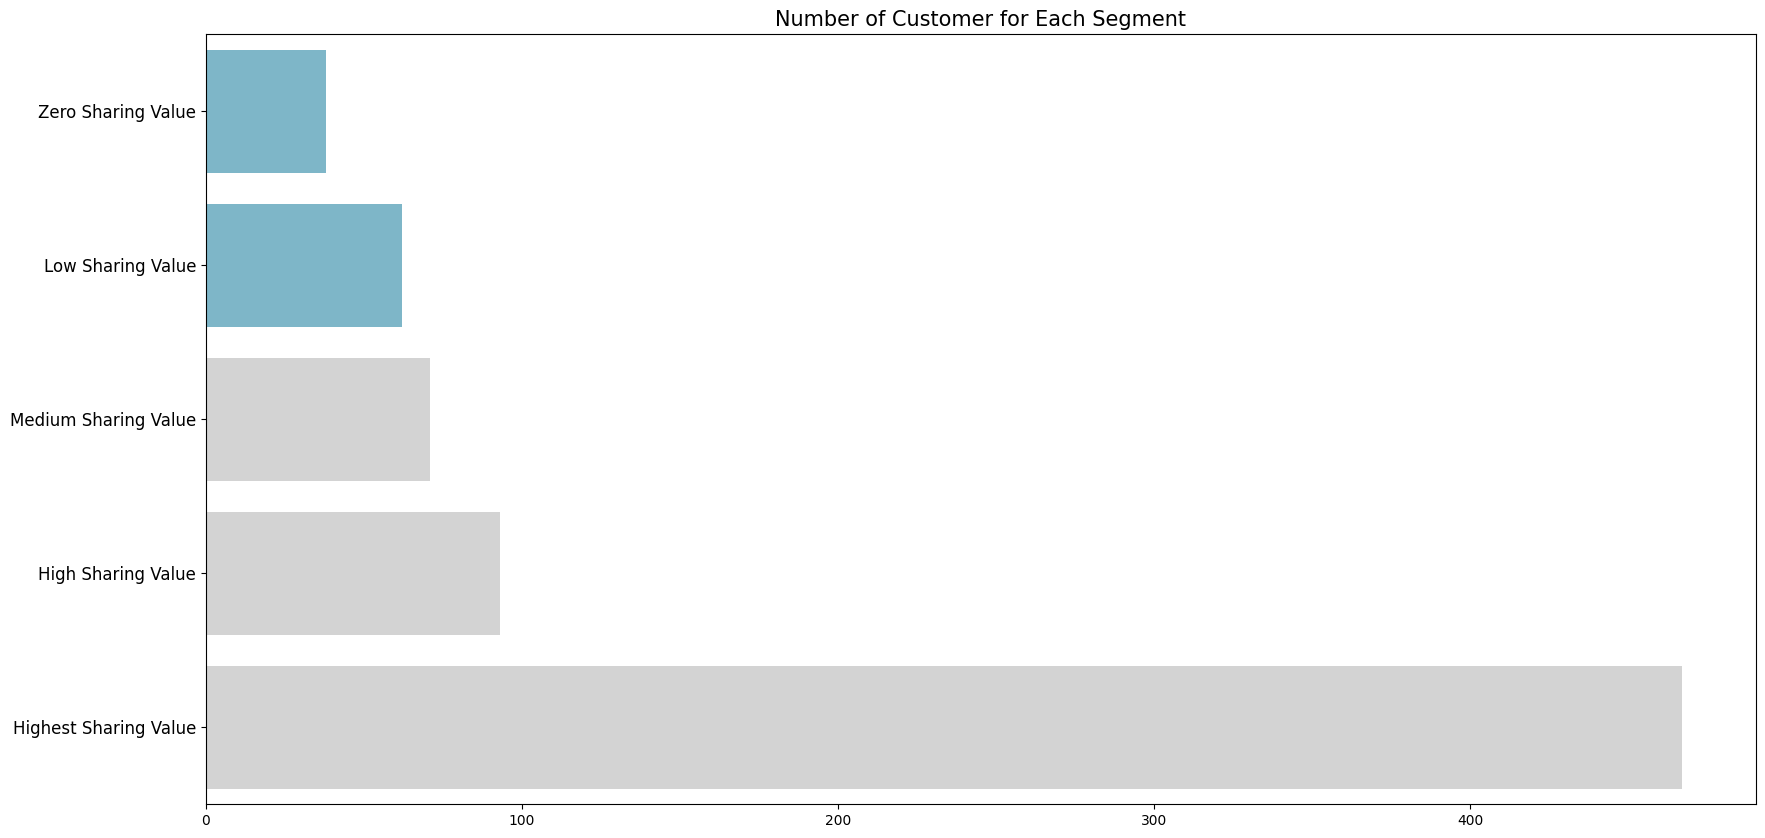

In [553]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['segmen_sharing'], [
    "Zero Sharing Value", "Low Sharing Value", "Medium Sharing Value",
    "High Sharing Value", "Highest Sharing Value"
])


plt.figure(figsize=(20, 10))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="id_y",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

**Insight:**
- Pada bulan apa saja harga sewa sepeda paling tinggi dan paling rendah dalam 2 tahun terakhir?
  - Melakukan group data terlebih dahulu pada bulan dan count_y yang merupakan totalan dari jam penyewaan.
  - Membuat subplot dalam memberikan visualisasi data dari **Best month of bike sharing yaitu, bulan july. Worst month of bike sharing yaitu, bulan january.**
  - Mengurutkan bulan yang awalnya diurutkan berdasarkan abjad menjadi January-December.
  - Membuat grafik dalam melihat Penyewaan dalam 2 tahun terakhir pada bulan January-December.


- Bagaimana cuaca "temp, atemp, humidity,dan windspeed" dapat mempengaruhi tingkat sewa sepeda?
  - Membuat correlation matrix untuk melihat regresi tingkat penyewaan sepeda yang paling sering muncul dalam hubungan cuaca.
  - Korelasi antar temp_y dengan count_y memiliki **korelasi positif, dimana semakin tinggi suhu, tingkat penyewaan sepeda semakin meningkat.**
  - Korelasi antara atemp_y dengan count_y memiliki **korelasi positif, semakin tinggi atemp maka semakin tinggi jumlah penyewaan sepeda.**
  - Korelasi antara humidity_y dengan count_y memiliki **korelasi negatif. Apabila tingkat humidity rendah dan tinggi maka, tingkat penyewaan sepeda akan berkurang. Apabila humidity di skala 0.4 sampai 0.6 maka tingkat penyewaan sepeda akan banyak (humidity normal)**.
  - Korelasi antara windspeed_y dengan count_y memiliki **korelasi positif. Tingkat penyewaan sepeda akan tinggi apabila windspeed rendah dan menurun apabila tingkat windspeed meningkat.**

In [554]:
!pip freeze > /requirements.txt

Access is denied.
